### Finding difference between optimization technique

####  import the package need 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

%matplotlib inline

#### load the dataset and view dataset 

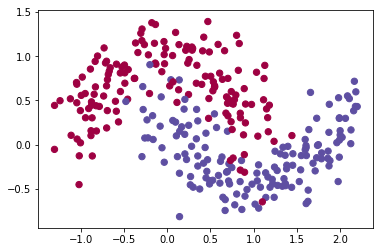

In [2]:
np.random.seed(3)
train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 
# Visualize the data
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral)
train_X = train_X.T
train_Y = train_Y.reshape((1, train_Y.shape[0]))

In [9]:
m = 300
feature = 2

tf.reset_default_graph()
train_X.shape

(2, 300)

#### Create the placeholder for input and output 

In [10]:
X = tf.placeholder(dtype=tf.float32, shape = [2, None], name = 'Input')
Y = tf.placeholder(dtype=tf.float32, shape = [1, None], name = 'Output')

#### initialize the weight  

In [100]:
W1 = tf.Variable(tf.random_normal([4,feature], seed = 1) * np.sqrt(1 / feature), dtype = tf.float32,name = 'Weight_l1')
b1 = tf.Variable(tf.zeros([4,1]), dtype = tf.float32, name = 'bias_l1')

W2 = tf.Variable(tf.random_normal([2,4]) * np.sqrt(1 / 4), dtype = tf.float32,name = 'Weight_l2')
b2 = tf.Variable(tf.zeros([2,1]), dtype = tf.float32, name = 'bias_l2')

W3 = tf.Variable(tf.random_normal([1,2]), dtype= tf.float32, name = 'Weight_l3')
b3 = tf.Variable(tf.zeros([1,1]), dtype = tf.float32, name = 'bias_l3')

#### Forward propagation

In [101]:
A0 = X

Z1 = tf.matmul(W1, A0) + b1
A1 = tf.nn.relu(Z1, 'Activation_l1')

Z2 = tf.matmul(W2, A1) + b2
A2 = tf.nn.relu(Z2, 'Activation_l2')

Z3 = tf.matmul(W3, A2) + b3
A3 = tf.sigmoid(Z3, 'Activation_l3')

#### use different optimization technique and compare them 

In [102]:
loss = tf.reduce_mean(Y * tf.log(A3) + (1 - Y) * tf.log(1 - A3)) * (-1)

optimization_Grad = tf.train.GradientDescentOptimizer(learning_rate= 0.03).minimize(loss)

optimization_Adam = tf.train.AdamOptimizer(learning_rate= 0.01, beta1=0.9, beta2=0.99, epsilon=1e-4).minimize(loss)

optimization_momentum = tf.train.AdamOptimizer(learning_rate=0.01, beta1=0.9, beta2=1, epsilon=1).minimize(loss)

init = tf.global_variables_initializer()

In [113]:
batch_size = 64
batch_iteration = 4

epoch = 300
iteration_cost = []

In [114]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(epoch):
        
        for j in range(batch_iteration):
            _,l = sess.run([optimization_Grad, loss], {X:train_X[:,j*batch_size:(j+1)*batch_size], Y:train_Y[:,j*batch_size:(j+1)*batch_size]})
            iteration_cost.append(l)
            
        _,l = sess.run([optimization_Grad, loss], {X:train_X[:,256:], Y:train_Y[:,256:]})
        iteration_cost.append(l)
        
    w_1 = W1.eval()
    b_1 = b1.eval()
    w_2 = W2.eval()
    b_2 = b2.eval()
    w_3 = W3.eval()
    b_3 = b3.eval()

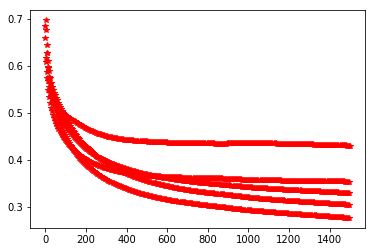

In [115]:
plt.plot(iteration_cost,'r*')

In [116]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0,z)

test = np.array([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0])

relu(test)

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  1. ,  1.5,  2. ])

#### Training accuracy and prediction accuracy 

In [118]:
A_0 = train_X

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = sigmoid(Z_3)

correct_train_number = np.sum(np.abs(train_Y - A_3) < 0.5)

print('Training_accuracy ', correct_train_number / 300)

Training_accuracy  0.87


In [123]:
x = []

for i in np.arange(-1.5,2.5,0.1):
    for j in np.arange(-1.0, 1.5, 0.1):
        x.append([i,j])

A_0 = np.array(x).T

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = sigmoid(Z_3)

A_3 = A_3 > 0.5

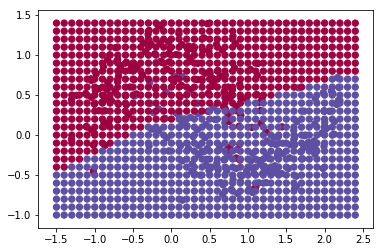

In [124]:
plt.scatter(train_X[0,:], train_X[1,:], c=train_Y[0,:], s=40, cmap=plt.cm.Spectral)

plt.hold

plt.scatter(A_0[0,:], A_0[1,:], c = A_3[0,:], s = 40, cmap = plt.cm.Spectral )

In [132]:
batch_size = 64
batch_iteration = 4

epoch = 300
iteration_cost = []

In [133]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(epoch):
        
        for j in range(batch_iteration):
            _,l = sess.run([optimization_Adam, loss], {X:train_X[:,j*batch_size:(j+1)*batch_size], Y:train_Y[:,j*batch_size:(j+1)*batch_size]})
            iteration_cost.append(l)
            
        _,l = sess.run([optimization_Adam, loss], {X:train_X[:,256:], Y:train_Y[:,256:]})
        iteration_cost.append(l)
        
    w_1 = W1.eval()
    b_1 = b1.eval()
    w_2 = W2.eval()
    b_2 = b2.eval()
    w_3 = W3.eval()
    b_3 = b3.eval()

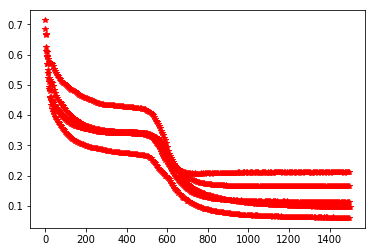

In [134]:
plt.plot(iteration_cost,'r*')

####  Training accuracy and prediction accuracy 

In [135]:
A_0 = train_X

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = sigmoid(Z_3)
correct_train_number = np.sum(np.abs(train_Y - A_3) < 0.5)

print('Training_accuracy ', correct_train_number / 300)

Training_accuracy  0.943333333333


In [137]:
x = []

for i in np.arange(-1.5,2.5,0.1):
    for j in np.arange(-1.0, 1.5, 0.1):
        x.append([i,j])

A_0 = np.array(x).T

Z_1 = np.dot(w_1, A_0) + b_1
A_1 = relu(Z_1)

Z_2 = np.dot(w_2, A_1) + b_2
A_2 = relu(Z_2)

Z_3 = np.dot(w_3, A_2) + b_3
A_3 = sigmoid(Z_3)

A_3 = A_3 > 0.5

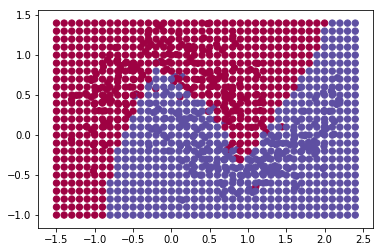

In [138]:
plt.scatter(train_X[0,:], train_X[1,:], c=train_Y[0,:], s=40, cmap=plt.cm.Spectral)

plt.hold

plt.scatter(A_0[0,:], A_0[1,:], c = A_3[0,:], s = 40, cmap = plt.cm.Spectral )

#### Comment
#### For the same number of iteration, Gradient descent achieve only 87% while Adam optimizer achieve 94% accuracy.